# understanding assosiation rules using apriori model

In [18]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import os 
from mlxtend.preprocessing import TransactionEncoder


In [19]:

assosiation_dir='../assosiation_rules/'
os.makedirs(assosiation_dir,exist_ok=True)
# Load dataset
df = pd.read_csv("../data/gym_membership.csv",usecols=['fav_group_lesson'])  # Change the filename
MIN_SUPPORT=.015
# Assume column name is 'fav_group_lesson' (modify if needed)
df['fav_group_lesson'] = df['fav_group_lesson'].fillna('')  # Handle NaN values

# Split the comma-separated values into lists
df['fav_group_lesson'] = df['fav_group_lesson'].apply(lambda x: x.split(', '))

# Convert into a transactional list format
transactions = df['fav_group_lesson'].tolist()

# Convert transactions into a DataFrame for Apriori

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=MIN_SUPPORT, use_colnames=True)  # Adjust min_support
frequent_itemsets.sort_values('support',inplace=True,ascending=False)
# Extract association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.sort_values('support',inplace=True,ascending=False)

# Display results
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules)

# Save to CSV
frequent_itemsets.to_csv(os.path.join(assosiation_dir,f"frequent_items_support_{MIN_SUPPORT}.csv"), index=False)
rules.to_csv(os.path.join(assosiation_dir,f"association_rules_support_{MIN_SUPPORT}.csv"), index=False)


Frequent Itemsets:
     support                itemsets
0     0.497                      ()
2     0.112              (BodyPump)
5     0.099              (LesMiles)
3     0.097                   (HIT)
6     0.095               (Pilates)
9     0.090                 (XCore)
10    0.090                  (Yoga)
1     0.087           (BodyBalance)
8     0.085              (Spinning)
4     0.085             (Kickboxen)
7     0.082               (Running)
11    0.081                 (Zumba)
22    0.019         (Yoga, Pilates)
14    0.017     (BodyPump, Pilates)
18    0.017        (HIT, Kickboxen)
17    0.016       (BodyPump, Zumba)
20    0.016   (LesMiles, Kickboxen)
23    0.016       (XCore, Spinning)
15    0.016       (BodyPump, XCore)
16    0.015        (BodyPump, Yoga)
19    0.015         (HIT, LesMiles)
21    0.015     (LesMiles, Running)
13    0.015   (BodyPump, Kickboxen)
12    0.015  (BodyBalance, Running)

Association Rules:
       antecedents    consequents  antecedent support  conse

## Bar Chart for Frequent Itemsets


/tmp/ipykernel_21705/169075501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_frequent['itemsets'].apply(lambda x: ', '.join(x)), x=top_frequent['support'], palette="viridis")


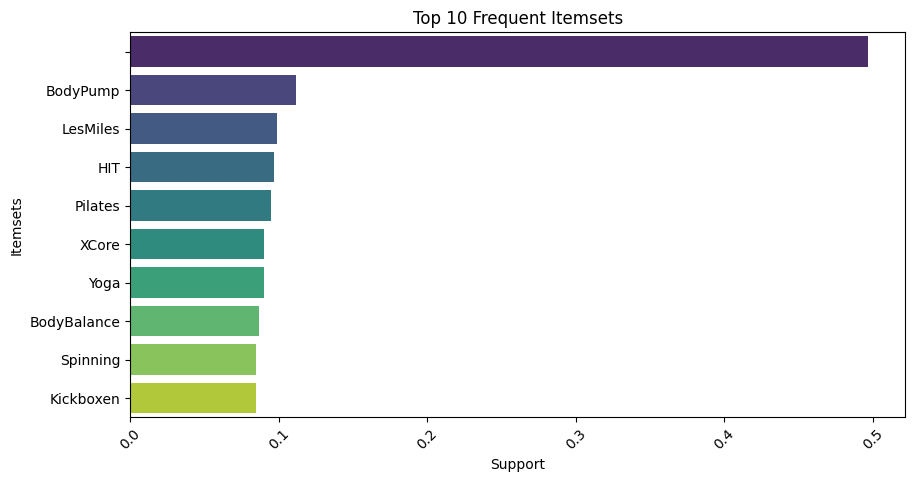

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top 10 Frequent Itemsets
top_frequent = frequent_itemsets.nlargest(10, 'support')

plt.figure(figsize=(10, 5))
sns.barplot(y=top_frequent['itemsets'].apply(lambda x: ', '.join(x)), x=top_frequent['support'], palette="viridis")
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.xticks(rotation=45)
plt.show()


## Scatter Plot for Association Rules

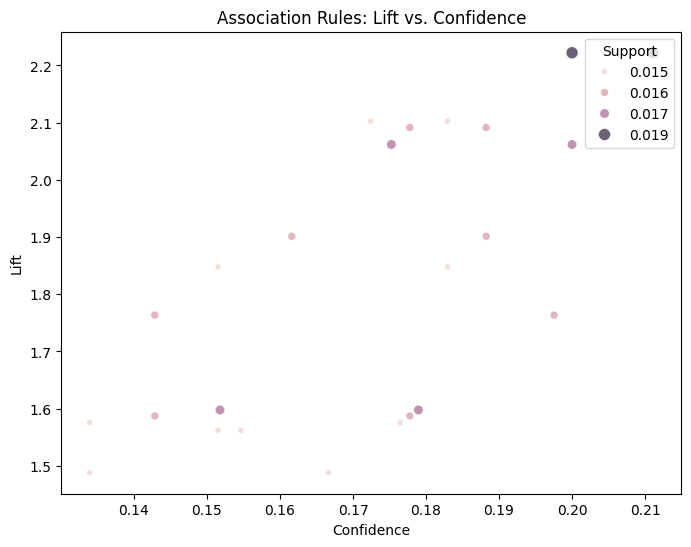

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=rules['confidence'], 
    y=rules['lift'], 
    size=rules['support'], 
    hue=rules['support'], 
    alpha=0.7, 
    # palette='cividis'
)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Lift vs. Confidence')
plt.legend(title="Support", loc='upper right')
plt.show()


## Heatmap for Top Associations

This heatmap will displayes the support of the most frequent pairs.


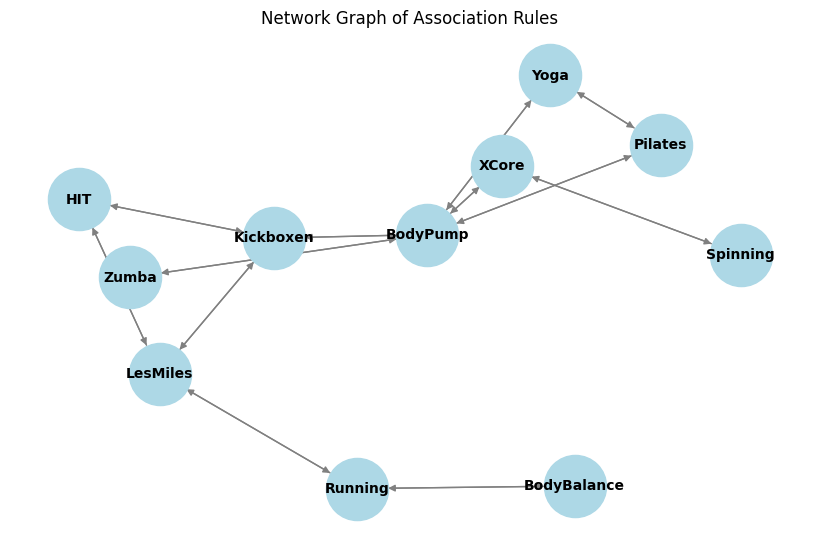

In [22]:
import networkx as nx
def clean_txt(text): 
    return text.replace('frozenset','').replace("'","").replace('{',"").replace('}',"").replace(')','').replace('(','')
# Create graph of rules
G = nx.DiGraph()

for i, row in rules.iterrows():
    G.add_edge(clean_txt(str(row['antecedents'])), clean_txt(str(row['consequents'])), weight=row['support'])

plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, edge_color="gray", node_color="lightblue", node_size=2000, font_size=10, font_weight='bold')
plt.title("Network Graph of Association Rules")
print("This heatmap will displayes the support of the most frequent pairs.")
plt.show()


In [25]:
os.makedirs(os.path.join(assosiation_dir,'figures'),exist_ok=True)
plt.savefig(os.path.join(assosiation_dir,'figures', "frequent_itemsets_plot.png"))
plt.savefig(os.path.join(assosiation_dir,'figures' ,"association_rules_scatter.png"))
plt.savefig(os.path.join(assosiation_dir,'figures', "association_rules_network.png"))
print("saved figures to dir:",assosiation_dir)

saved figures to dir: ../assosiation_rules/


<Figure size 640x480 with 0 Axes>